## Exercise 5 : Perform ARIMA on air pollution data

### Step 1 : Read test CSV File with PM2.5 Values

In [1]:
# Using pandas library read csv files as dataframe 
import pandas as pd

train_df = pd.read_csv('ex07_data/30201130PM25_train.csv')

### Step 2 : Create lag and residual columns for the dataframe

In [2]:
# create lag columns for dataframe using pandas inbuilt shift function (take first 2 lags)
import numpy as np
train_df.replace(9999, np.nan, inplace=True)
train_df.fillna(0, inplace=True)

train_df['lag1'] = train_df['pm25'].shift(1)
train_df['lag2'] = train_df['lag1'].shift(1)

# create residuals using diff function in pandas library
train_df['residuals'] = train_df['pm25'].diff()

### Step 3 Plot Data to analyze TREND (plot first 200 items for clear analysis)

Analyze whether data is stationary or not. If not stationary plot autocorrelation plot for residuals and determine 'd' (differencing order)

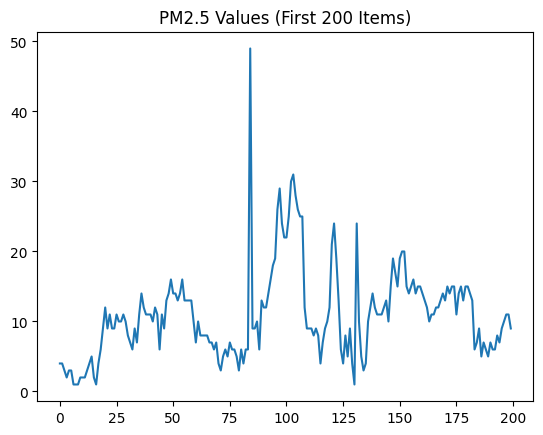

In [3]:
import matplotlib.pyplot as plt

plt.plot(train_df['pm25'].head(200))
plt.title('PM2.5 Values (First 200 Items)')
plt.show()

### Step 4 : Plot Auto Correlation plot of the data and determine 'q' value(plot first 200 items for clear analysis)

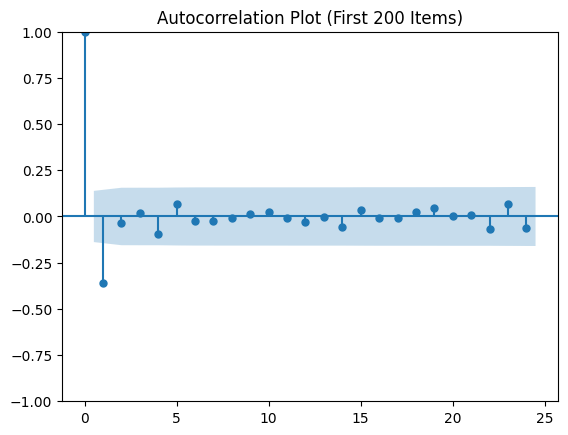

In [4]:
from statsmodels.graphics.tsaplots import plot_acf

residuals = train_df['residuals'].dropna()

plot_acf(residuals.head(200))
plt.title('Autocorrelation Plot (First 200 Items)')
plt.show()

### Step 5 : Plot Partial Auto Correlation Plot of the data and determine 'p' value(plot first 200 items for clear analysis)

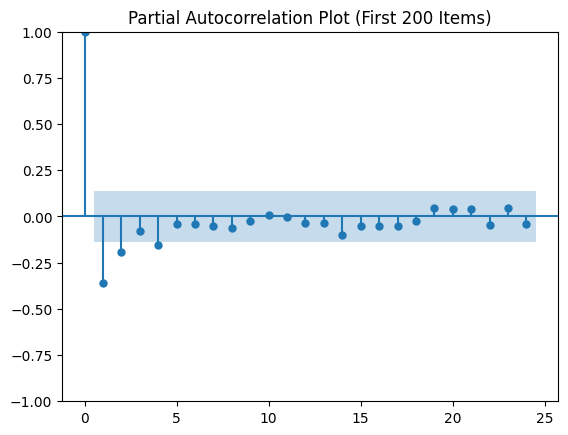

In [5]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot the partial autocorrelation plot of the residuals
plot_pacf(residuals.head(200))
plt.title('Partial Autocorrelation Plot (First 200 Items)')
plt.show()

### Step 6 : Fit ARIMA model to the  data 

In [6]:
# import ARIMA from statsmodel library and fit to the train data set
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

arima_order = auto_arima(train_df['pm25']).order

model = ARIMA(train_df['pm25'], order=arima_order)
model_fit = model.fit()

/home/student/s1290229/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



### Step 7 : Predict Values using ARIMA model

In [7]:
# Forecast values 
forecast = model_fit.predict(start=len(train_df), end=len(train_df) + 175)

### Step 8: Evaluating the ARIMA model

In [8]:
# Read test CSV File with pm2.5 values
test_df = pd.read_csv('ex07_data/30201130PM25_test.csv')

In [9]:
# Calculate error and compare its performance 
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_df['pm25'], forecast)
print(mse)

48.150788895330855


### Step 9 : Try to change p,q,d values and observe model performance (optional)

In [10]:
## 1,2,1
model = ARIMA(train_df['pm25'], order=(1,2,1))
model_fit = model.fit()
forecast = model_fit.predict(start=len(train_df), end=len(train_df) + 175)
mse = mean_squared_error(test_df['pm25'], forecast)
print(mse)

78.49090538180711


In [11]:
#2,2,1
model = ARIMA(train_df['pm25'], order=(2,2,1))
model_fit = model.fit()
forecast = model_fit.predict(start=len(train_df), end=len(train_df) + 175)
mse = mean_squared_error(test_df['pm25'], forecast)
print(mse)

69.26185512903186


In [12]:
#2,2,2
model = ARIMA(train_df['pm25'], order=(2,2,2))
model_fit = model.fit()
forecast = model_fit.predict(start=len(train_df), end=len(train_df) + 175)
mse = mean_squared_error(test_df['pm25'], forecast)
print(mse)

54.42614731805873


In [13]:
#7,2,3
model = ARIMA(train_df['pm25'], order=(7,2,3))
model_fit = model.fit()
forecast = model_fit.predict(start=len(train_df), end=len(train_df) + 175)
mse = mean_squared_error(test_df['pm25'], forecast)
print(mse)

/home/student/s1290229/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/student/s1290229/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/student/s1290229/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


51.81690649407251
